# Задача

In [54]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 15.6 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.2.0-py3-none-any.whl size=158196 sha256=46a7ec570114cce561b63fce152a4f8b73d8d6222d190d3a7637a90e78581ba3
  Stored in directory: /root/.cache/pip/wheels/5a/b5/4e/216953a1c711da55de29ed7ecf158b4a5bf32ef93d69ad66dd
Successfully built fugue-sq

In [57]:
import numpy as np
import pandas as pd
from statsforecast.models import AutoARIMA, _TS
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from google.colab import drive
drive.mount('/content/drive')
way = "/content/drive/MyDrive/Colab_Notebooks/aaa_ml/datasets/"

Mounted at /content/drive


In [3]:
df = pd.read_csv(way + 'HW_1_2_ts.csv')
df.head(5)

,ds,y
0,2011-01-29,6853
1,2011-01-30,7030
2,2011-01-31,5124
3,2011-02-01,5470
4,2011-02-02,4602


In [4]:
df_c = pd.read_csv(way + 'HW_1_2_calendar.csv')
df_c.head(5)

,date,holiday_1,holiday_2,exog_param
0,2011-01-29,NaN,NaN,0
1,2011-01-30,NaN,NaN,0
2,2011-01-31,NaN,NaN,0
3,2011-02-01,NaN,NaN,1
4,2011-02-02,NaN,NaN,0


<ipython-input-5-45786f66bf6c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_c, x='exog_param', y='holiday_1', inner='box', palette='Dark2')


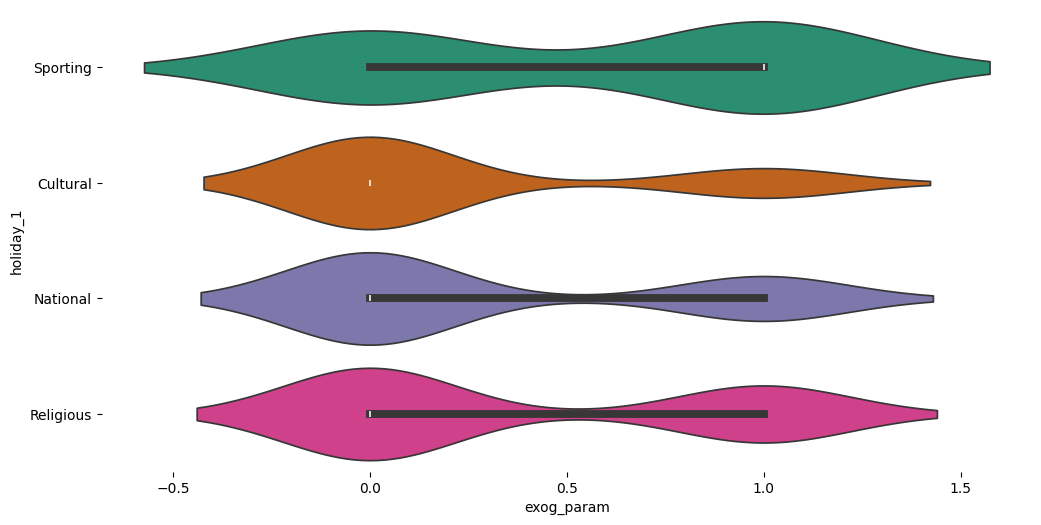

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_c['holiday_1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_c, x='exog_param', y='holiday_1', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
df_c['holiday_1'].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: holiday_1, dtype: int64

In [14]:
df_c[~df_c['holiday_2'].isna()].value_counts()

date        holiday_1  holiday_2  exog_param
2011-04-24  Religious  Cultural   0             1
2013-05-05  Religious  Cultural   1             1
2014-04-20  Cultural   Religious  0             1
2014-06-15  Sporting   Cultural   1             1
2016-06-19  Sporting   Cultural   0             1
dtype: int64

In [15]:
print(f'{df.shape}\n{df_c.shape}')

(1879, 2)
(1969, 4)


In [17]:
fig = px.line(df, x='ds', y='y', title='Graph 1')

#fig.update_xaxes()

fig.show()

In [42]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
cat_encoded = ohe.fit_transform(np.array(df_c['holiday_1']).reshape(-1, 1))
cat_encoded = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(), index = df_c.index)
df_c_oh = pd.concat([df_c, cat_encoded], axis=1)
df_c_oh = df_c_oh.drop(['holiday_1', 'holiday_2', 'x0_nan'], axis = 1).rename({
    'date': 'ds', 'x0_Cultural': 'cul', 'x0_National': 'nat', 'x0_Religious': 'rel', 'x0_Sporting': 'spo'}, axis = 1)
df_c_oh

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,ds,exog_param,cul,nat,rel,spo
0,2011-01-29,0,0.0,0.0,0.0,0.0
1,2011-01-30,0,0.0,0.0,0.0,0.0
2,2011-01-31,0,0.0,0.0,0.0,0.0
3,2011-02-01,1,0.0,0.0,0.0,0.0
4,2011-02-02,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1964,2016-06-15,1,0.0,0.0,0.0,0.0
1965,2016-06-16,0,0.0,0.0,0.0,0.0
1966,2016-06-17,0,0.0,0.0,0.0,0.0
1967,2016-06-18,0,0.0,0.0,0.0,0.0


In [45]:
df_fin = pd.merge(df, df_c_oh, on='ds', how='right')
df_fin.tail(5)

,ds,y,exog_param,cul,nat,rel,spo
1964,2016-06-15,NaN,1,0.0,0.0,0.0,0.0
1965,2016-06-16,NaN,0,0.0,0.0,0.0,0.0
1966,2016-06-17,NaN,0,0.0,0.0,0.0,0.0
1967,2016-06-18,NaN,0,0.0,0.0,0.0,0.0
1968,2016-06-19,NaN,0,0.0,0.0,0.0,1.0


In [49]:
n_main = df.shape[0]
n_forecast = df_c.shape[0] - n_main

In [77]:
df_train = df_fin[:n_main]
df_test = df_fin[n_main:]
df_tr = df_train[:(n_main-n_forecast)]
df_val = df_train[(n_main-n_forecast):]
df_train.tail(5)

,ds,y,exog_param,cul,nat,rel,spo
1874,2016-03-17,6479.0,0,1.0,0.0,0.0,0.0
1875,2016-03-18,7021.0,0,0.0,0.0,0.0,0.0
1876,2016-03-19,7389.0,0,0.0,0.0,0.0,0.0
1877,2016-03-20,8482.0,0,0.0,0.0,0.0,0.0
1878,2016-03-21,6473.0,0,0.0,0.0,0.0,0.0


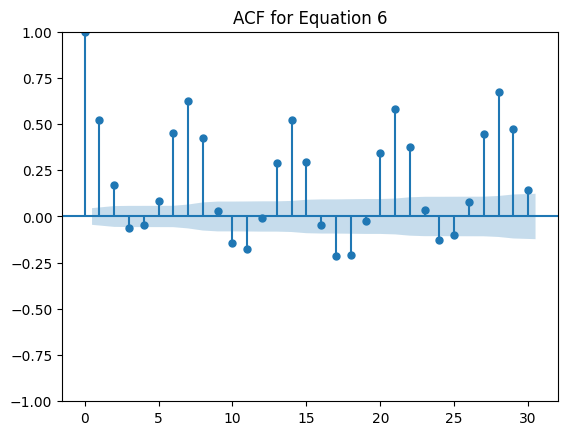

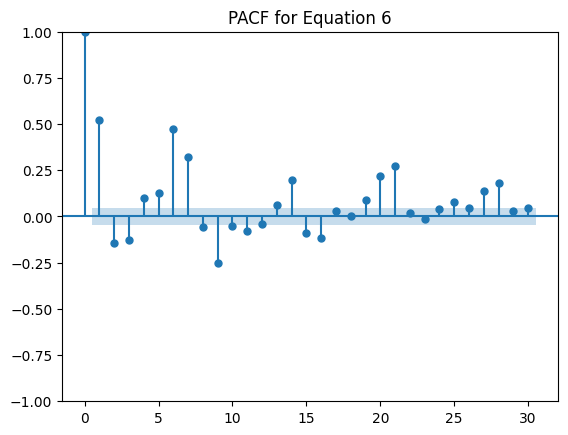

In [76]:
plot_acf(df_train['y'], lags=30)
plt.title('ACF for Equation 6')
plt.show()

plot_pacf(df_train['y'], lags=30)
plt.title('PACF for Equation 6')
plt.show()

In [68]:
model3 = AutoARIMA(
    max_p = 20,
    max_q = 20,
    max_d = 4,
    max_P = 10,
    max_Q = 10,
    max_D = 3,
    start_p = 10,
    start_q = 10,
    seasonal=True,
    season_length = 7,
    ic = 'aicc',
    trace = True,
    stepwise = True,
    approximation=True,
    )

exogs = ['exog_param', 'cul', 'nat', 'rel', 'spo']
model3.fit(y=df_train['y'].values, X=df_train[exogs].values)

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]



Fitting models using approximations to speed things up


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 1]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(6,0,6)(1,1,1)[7] errors:inf

Regression with ARIMA(0,0,0)(0,1,0)[7] errors:30698.04732514765


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(1,0,0)(1,1,0)[7] errors:30243.27176286414


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(0,1,1)[7] errors:29849.549579587157

Regression with ARIMA(0,0,1)(0,1,0)[7] errors:30608.347732891656


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(1,1,1)[7] errors:29833.031584299035


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(1,1,0)[7] errors:30267.963299155064


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(2,1,1)[7] errors:29839.100617526346


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(1,1,2)[7] errors:29830.087348436875


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(0,1,2)[7] errors:29840.5378159603


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(2,1,2)[7] errors:29849.4202547319


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(1,1,3)[7] errors:29831.14456638337


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(0,1,3)[7] errors:29838.733682792754


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,1)(2,1,3)[7] errors:29845.518983372745


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,0)(1,1,2)[7] errors:29985.482157734386


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(1,0,1)(1,1,2)[7] errors:inf


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,2)(1,1,2)[7] errors:29783.23964141751


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,2)(0,1,2)[7] errors:29795.666454522736


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,2)(1,1,1)[7] errors:29785.92197008272


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,2)(2,1,2)[7] errors:29790.089622332667


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 1]




Regression with ARIMA(0,0,2)(1,1,3)[7] errors:29784.90095830686


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,2)(0,1,1)[7] errors:29814.86590923745


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,2)(0,1,3)[7] errors:29794.995980498737


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,2)(2,1,1)[7] errors:29812.120603775224


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,2)(2,1,3)[7] errors:29788.391271637185


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 1]




Regression with ARIMA(1,0,2)(1,1,2)[7] errors:inf


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,3)(1,1,2)[7] errors:29768.24923535304


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,3)(0,1,2)[7] errors:29795.25268813802


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,3)(1,1,1)[7] errors:29770.41638090581


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,3)(2,1,2)[7] errors:29775.59425175449


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,3)(1,1,3)[7] errors:29770.164778429145


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,3)(0,1,1)[7] errors:29793.252093804895


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,3)(0,1,3)[7] errors:29782.208427458467


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 1]




Regression with ARIMA(0,0,3)(2,1,1)[7] errors:29783.98343765033

Regression with ARIMA(0,0,3)(2,1,3)[7] errors:29774.298690794247


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(1,0,3)(1,1,2)[7] errors:inf


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,4)(1,1,2)[7] errors:29766.6187547246


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,4)(0,1,2)[7] errors:29773.896242641316

Regression with ARIMA(0,0,4)(1,1,1)[7] errors:29755.541184122765


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,4)(0,1,1)[7] errors:29781.83193642596

Regression with ARIMA(0,0,4)(1,1,0)[7] errors:30232.747980414762


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,4)(2,1,1)[7] errors:29771.087361377682

Regression with ARIMA(0,0,4)(0,1,0)[7] errors:30575.380604973878


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,4)(2,1,0)[7] errors:30003.38959618629


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(0,0,4)(2,1,2)[7] errors:29760.70419626833


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 2]




Regression with ARIMA(1,0,4)(1,1,1)[7] errors:inf

Regression with ARIMA(0,0,5)(1,1,1)[7] errors:29756.86917710667


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:913: UserWarning:

possible convergence problem: minimize gave code 1]




Regression with ARIMA(1,0,3)(1,1,1)[7] errors:inf

Regression with ARIMA(1,0,5)(1,1,1)[7] errors:inf

Regression with ARIMA(1,0,5)(1,1,1)[7] errors:inf
Now re-fitting the best model(s) without approximations...


Regression with ARIMA(0,0,4)(1,1,1)[7] errors:29856.670194317077


AutoARIMA

In [69]:
from statsmodels.tsa.arima.model import ARIMA

best_arima = ARIMA(endog=df_train[['y']], exog=df_train[exogs], order=(0,0,5), seasonal_order=(1,1,1,7))
best_arima = best_arima.fit()
best_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1879
Model:             ARIMA(0, 0, 5)x(1, 1, [1], 7)   Log Likelihood              -14925.411
Date:                           Mon, 11 Mar 2024   AIC                          29876.823
Time:                                   17:16:46   BIC                          29948.774
Sample:                                        0   HQIC                         29903.330
                                          - 1879                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exog_param   980.6052     37.508     26.144      0.000     907.092    1054.119
cul          -90.4768    148.615     -0.609      0.543    -381.756     200.803
nat           44.1452     54.717      0.807      0.420     -63.099     151.389
rel          -40.0044    111.209     -0.360      0.719    -257.970     177.961
spo          -21.7157    134.586     -0.161      0.872    -285.499     242.068
ma.L1          0.2728      0.014     20.046      0.000       0.246       0.299
ma.L2          0.1724      0.020      8.716      0.000       0.134       0.211
ma.L3          0.1196      0.022      5.397      0.000       0.076       0.163
ma.L4          0.1120      0.024      4.580      0.000       0.064       0.160
ma.L5          0.0784      0.025      3.141      0.002       0.029       0.127
ar.S.L7        0.1553      0.023      6.888      0.000       0.111       0.200
ma.S.L7       -0.8887      0.012    -76.190      0.000      -0.912      -0.866
sigma2      4.864e+05   7598.035     64.011      0.000    4.71e+05    5.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):             54642.72
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
validation_horizon = 90
forecast_sarima = best_arima.predict()
#forecast_start = data_evaluation_x.shape[0]-validation_horizon

forecast_test_sarima = best_arima.forecast(validation_horizon, exog=df_test[exogs])

In [73]:
forecast_test_sarima[:62].shape

(62,)

# Профет

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

import scipy as sp

import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

import scipy as sp
import seaborn as sns

# Модельки
from statsmodels.tsa.arima.model import ARIMA
# Тесты
from statsmodels.tsa.stattools import adfuller, kpss, acf

import prophet as fp
import datetime
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go

from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import add_changepoints_to_plot

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

In [93]:
holidays_1 = df_c.dropna(subset=['holiday_1'])[['date', 'holiday_1']].rename(columns={'date': 'ds', 'holiday_1': 'holiday'})

In [122]:
param_grid = {
    'changepoint_prior_scale': [0.96, 0.98, 0.97],
    'seasonality_prior_scale': [50, 55, 60, 65],
    'n_changepoints': [18],
    'seasonality_mode':['additive', 'multiplicative'],
    'holidays_prior_scale':[0.1, 1, 10.0]
}

# Создадим все комбинации параметров
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # будем записывать ошибки в этот лист

# кросс валидация
for params in tqdm(all_params):
    m = fp.Prophet(**params, holidays = holidays_1)  # Fit model with given params
    m.add_regressor('exog_param', mode=params['seasonality_mode'])
    m.fit(df_train)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

  0%|          | 0/72 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8c_su8a/h78ca1g8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8c_su8a/8p83mcrq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60796', 'data', 'file=/tmp/tmpr8c_su8a/h78ca1g8.json', 'init=/tmp/tmpr8c_su8a/8p83mcrq.json', 'output', 'file=/tmp/tmpr8c_su8a/prophet_modelfjjxbq99/prophet_model-20240311212701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:27:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:27:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2013-07-05 00:00:00 and 2015-12-22 00:00:00
INFO:pr

In [126]:
param_grid = {
    'changepoint_prior_scale': [0.98, 0.97, 0.99],
    'seasonality_prior_scale': [65, 70],
    'n_changepoints': [17, 18, 19, 20, 21],
    'seasonality_mode':['additive', 'multiplicative'],
    'holidays_prior_scale':[10.0]
}

# Создадим все комбинации параметров
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # будем записывать ошибки в этот лист

# кросс валидация
for params in tqdm(all_params):
    m = fp.Prophet(**params, holidays = holidays_1)  # Fit model with given params
    m.add_regressor('exog_param', mode=params['seasonality_mode'])
    m.fit(df_train)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '90 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

  0%|          | 0/60 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8c_su8a/fmpl51oz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8c_su8a/vm5j4ucx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28728', 'data', 'file=/tmp/tmpr8c_su8a/fmpl51oz.json', 'init=/tmp/tmpr8c_su8a/vm5j4ucx.json', 'output', 'file=/tmp/tmpr8c_su8a/prophet_modelu2debg6y/prophet_model-20240311213420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:34:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2013-07-05 00:00:00 and 2015-12-22 00:00:00
INFO:pr

In [127]:
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
best_params = tuning_results.sort_values(by='mape').iloc[0]

best_params

changepoint_prior_scale        0.97
seasonality_prior_scale          65
n_changepoints                   19
seasonality_mode           additive
holidays_prior_scale           10.0
mape                       2.698065
Name: 24, dtype: object

our_params = {
    'changepoint_prior_scale': 0.98,
'seasonality_prior_scale' : 65,
'n_changepoints': 18,
'seasonality_mode': 'additive',
'holidays_prior_scale': 10}

changepoint_prior_scale              0.95
seasonality_prior_scale              50.0
n_changepoints                         20
seasonality_mode           multiplicative
holidays_prior_scale                  0.1
mape                             2.803392
Name: 142, dtype: object

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8c_su8a/oevaxzcm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr8c_su8a/5eirk2t9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8493', 'data', 'file=/tmp/tmpr8c_su8a/oevaxzcm.json', 'init=/tmp/tmpr8c_su8a/5eirk2t9.json', 'output', 'file=/tmp/tmpr8c_su8a/prophet_model5ufywf4q/prophet_model-20240311213930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:39:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:39:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


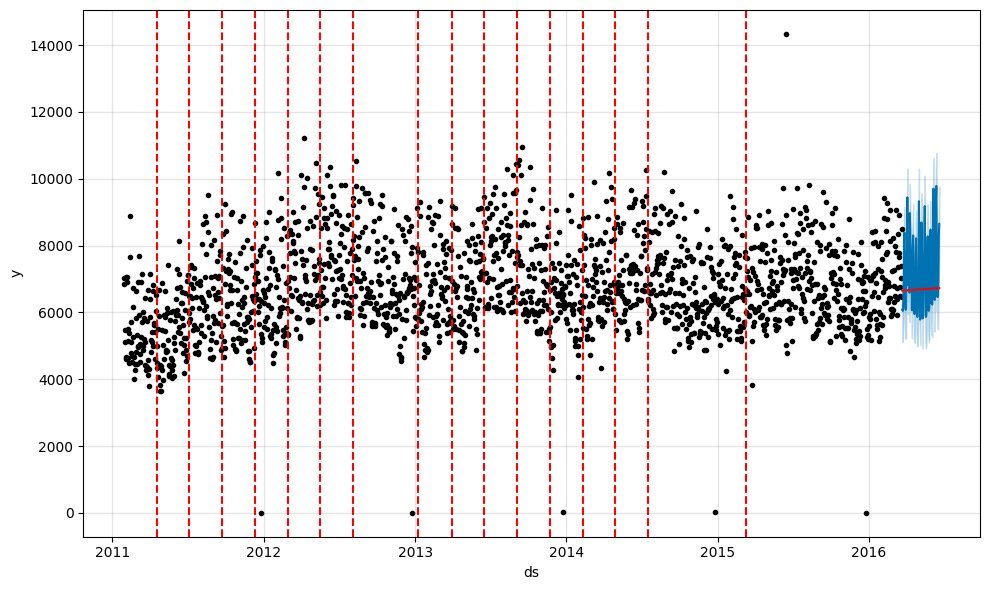

In [128]:
our_params = {
    'changepoint_prior_scale': 0.97,
'seasonality_prior_scale' : 65,
'n_changepoints': 19,
'seasonality_mode': 'additive',
'holidays_prior_scale': 10}

m = fp.Prophet(**our_params, holidays = holidays_1)

m.add_regressor('exog_param', mode=params['seasonality_mode'])
m.fit(df_train)

future = m.make_future_dataframe(periods=validation_horizon)
#future = future.merge(data_evaluation_x[['ds','oil']],how='left', on = 'ds')

forecast = m.predict(df_test)
pd.Series(forecast['yhat'].values[:62]).to_csv('solution.csv', header=False, index=False)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


In [116]:
forecast['yhat']

0     6028.147675
1     5986.308838
2     6204.981520
3     6550.870862
4     7942.363203
         ...     
85    7510.138259
86    6499.479401
87    7003.351420
88    8399.239952
89    8819.560620
Name: yhat, Length: 90, dtype: float64

In [117]:
pd.Series(forecast['yhat'].values[:62]).to_csv('solution.csv', header=False, index=False)

# Вводное

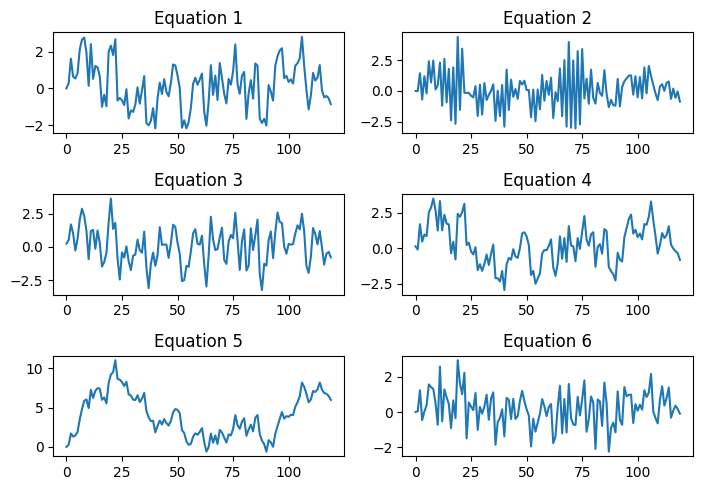

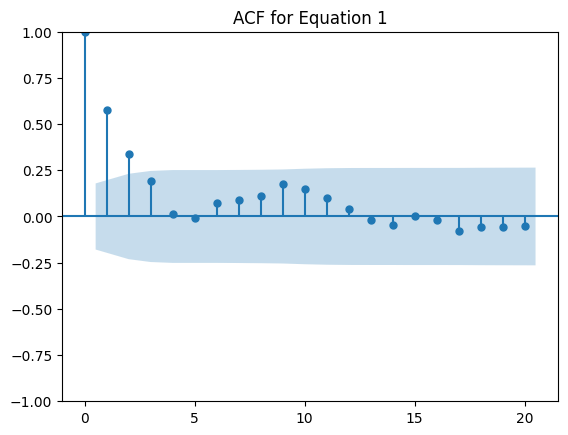

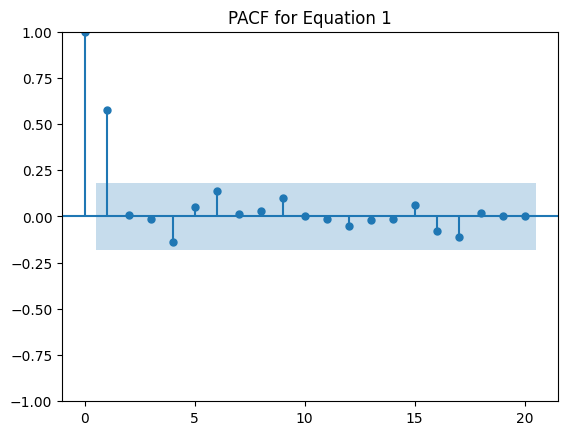

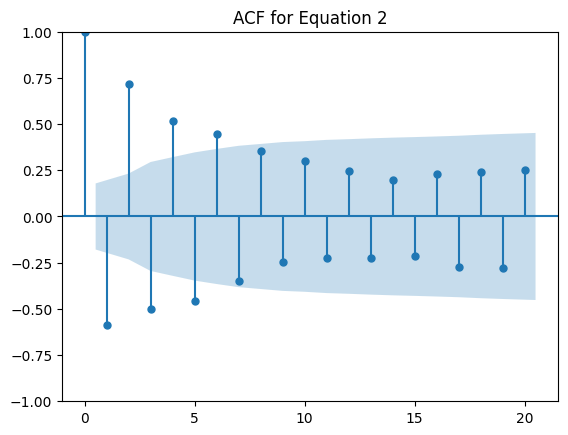

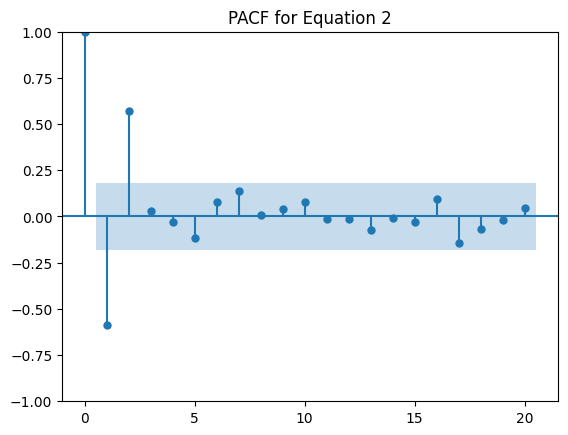

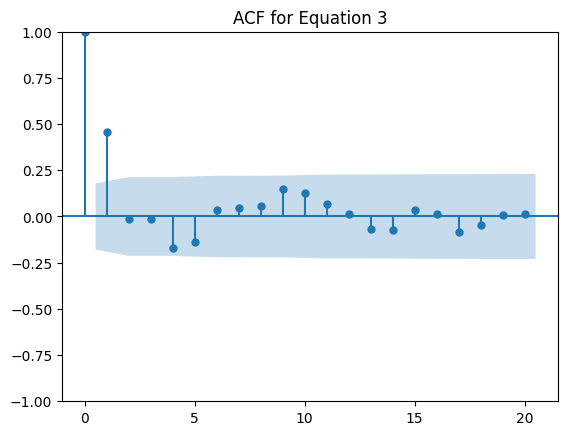

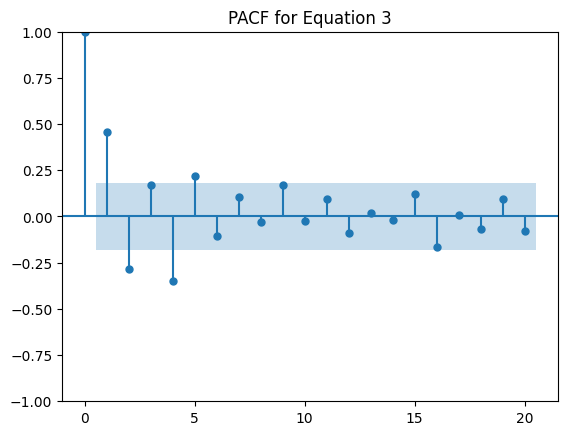

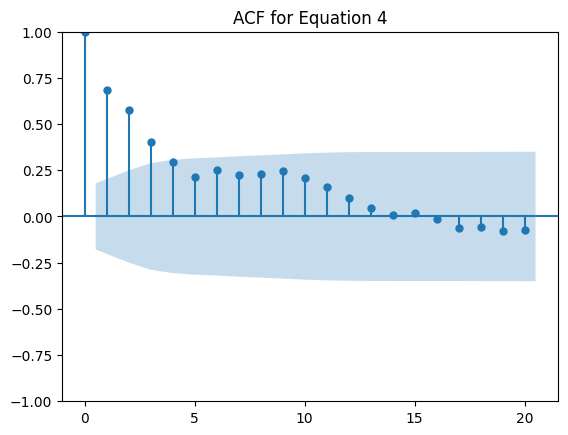

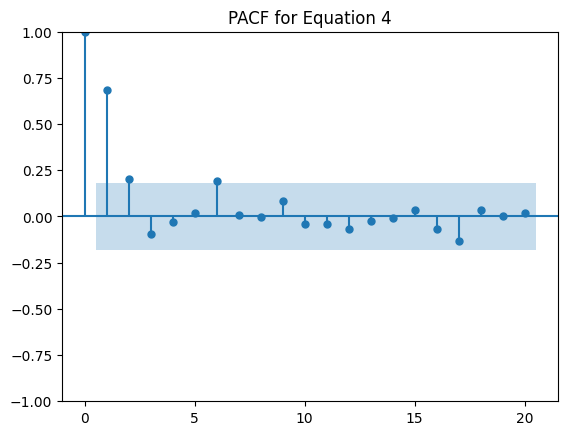

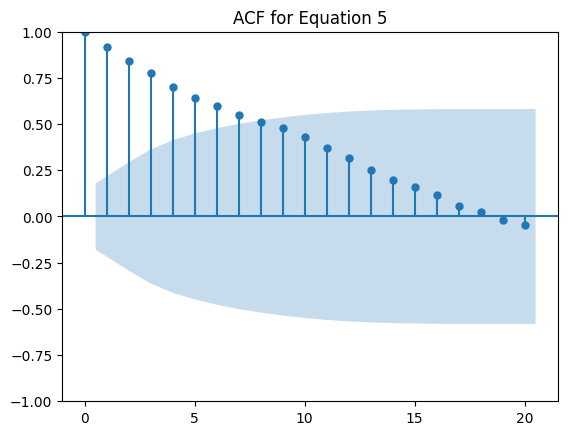

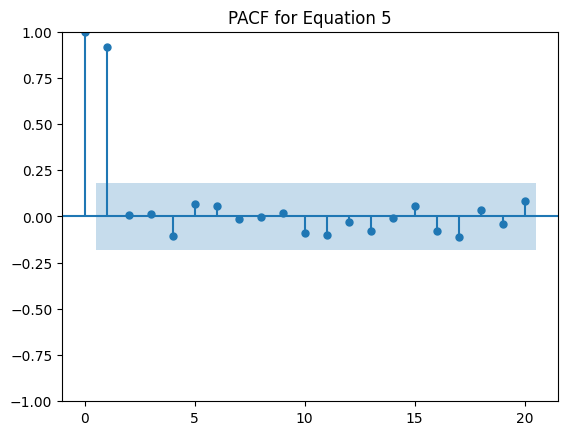

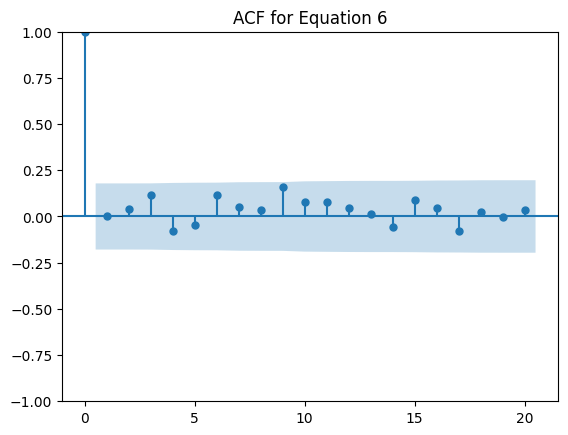

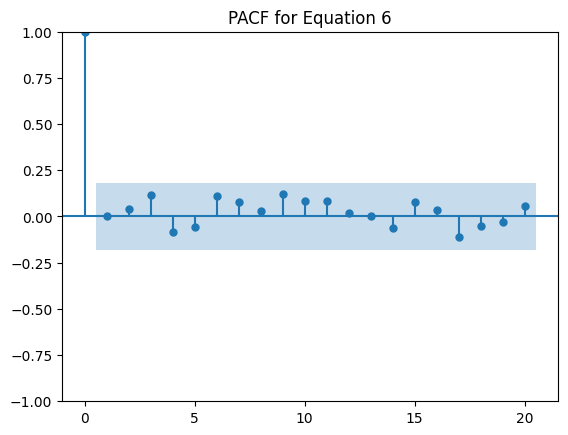

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ls = np.random.normal(loc = 0, scale = 1, size = 120)

# Сначала создадим временные ряды для каждой функции
def generate_time_series(func, n):
    """
    Генерация временного ряда для заданной функции
    func: функция для генерации временного ряда
    n: количество точек в ряде
    """
    ts = [func(i) for i in range(n)]
    return pd.Series(ts)

# Функция для генерации временного ряда для уравнения 1
def generate_time_series_1(n):
    ts = [0]
    for t in range(1, n):
        ts.append(0.64 * ts[t-1] + ls[t])
    return pd.Series(ts)

# Функция для генерации временного ряда для уравнения 2
def generate_time_series_2(n):
    ts = [0, 0]
    for t in range(2, n):
        ts.append(-0.2 * ts[t-1] + 0.64 * ts[t-2] + ls[t])
    return pd.Series(ts)

# Функция для генерации временного ряда для уравнения 3
def generate_time_series_3(n):
    ts = [ls[0]]
    for t in range(1, n):
        ts.append(ls[t] + ls[t - 1])
    return pd.Series(ts)

# Функция для генерации временного ряда для уравнения 4
def generate_time_series_4(n):
    ts = [np.random.normal(), np.random.normal()]
    for t in range(2, n):
        ts.append(0.64 * ts[t-2] + ls[t] + 0.64 * ls[t - 1])
    return pd.Series(ts)

# Функция для генерации временного ряда для уравнения 5
def generate_time_series_5(n):
    ts = [0]
    for t in range(1, n):
        ts.append(ts[t-1] + ls[t])
    return pd.Series(ts)

# Функция для генерации временного ряда для уравнения 6
def generate_time_series_6(n):
    ts = [0]
    for t in range(1, n):
        ts.append(ts[t-1] + ls[t] - 0.9 * ls[t - 1])
    return pd.Series(ts)

# Генерация временных рядов для каждого уравнения
n_points = 120
ts_1 = generate_time_series_1(n_points)
ts_2 = generate_time_series_2(n_points)
ts_3 = generate_time_series_3(n_points)
ts_4 = generate_time_series_4(n_points)
ts_5 = generate_time_series_5(n_points)
ts_6 = generate_time_series_6(n_points)

# Строим графики временных рядов
plt.figure(figsize=(7, 5))

plt.subplot(3, 2, 1)
plt.plot(ts_1)
plt.title('Equation 1')

plt.subplot(3, 2, 2)
plt.plot(ts_2)
plt.title('Equation 2')

plt.subplot(3, 2, 3)
plt.plot(ts_3)
plt.title('Equation 3')

plt.subplot(3, 2, 4)
plt.plot(ts_4)
plt.title('Equation 4')

plt.subplot(3, 2, 5)
plt.plot(ts_5)
plt.title('Equation 5')

plt.subplot(3, 2, 6)
plt.plot(ts_6)
plt.title('Equation 6')

plt.tight_layout()
plt.show()

# Строим графики ACF и PACF для каждого временного ряда
plot_acf(ts_1, lags=20)
plt.title('ACF for Equation 1')
plt.show()

plot_pacf(ts_1, lags=20)
plt.title('PACF for Equation 1')
plt.show()

plot_acf(ts_2, lags=20)
plt.title('ACF for Equation 2')
plt.show()

plot_pacf(ts_2, lags=20)
plt.title('PACF for Equation 2')
plt.show()

plot_acf(ts_3, lags=20)
plt.title('ACF for Equation 3')
plt.show()

plot_pacf(ts_3, lags=20)
plt.title('PACF for Equation 3')
plt.show()

plot_acf(ts_4, lags=20)
plt.title('ACF for Equation 4')
plt.show()

plot_pacf(ts_4, lags=20)
plt.title('PACF for Equation 4')
plt.show()

plot_acf(ts_5, lags=20)
plt.title('ACF for Equation 5')
plt.show()

plot_pacf(ts_5, lags=20)
plt.title('PACF for Equation 5')
plt.show()

plot_acf(ts_6, lags=20)
plt.title('ACF for Equation 6')
plt.show()

plot_pacf(ts_6, lags=20)
plt.title('PACF for Equation 6')
plt.show()


In [13]:
from google.colab import drive
drive.mount('/content/drive')
way = "/content/drive/MyDrive/Colab_Notebooks/aaa_ml/datasets/"

Mounted at /content/drive


In [15]:
df1 = pd.read_csv(way + 'HW_1_1.csv')
df1.head(5)

,date,y
0,2018-07-18,0.101160
1,2018-07-19,0.622773
2,2018-07-20,-0.796028
3,2018-07-21,3.154209
4,2018-07-22,1.800747


In [25]:
import plotly.express as px

# Создание графика с разреженными метками оси x
fig = px.line(df1, x='date', y='y', title='Graph 1')

# Установка меток оси x для каждого N-го элемента
N = 200  # Например, установим метки для каждого 200-го элемента
fig.update_xaxes()

fig.show()


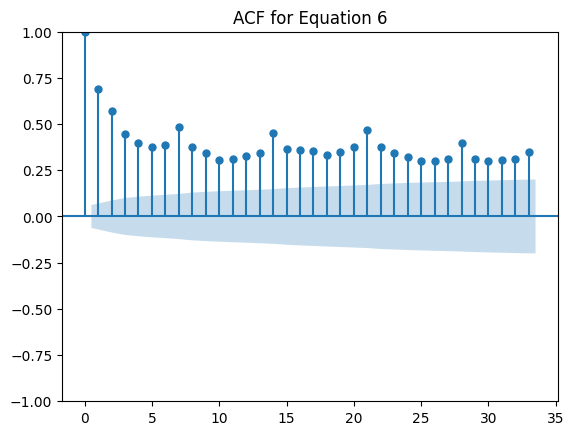

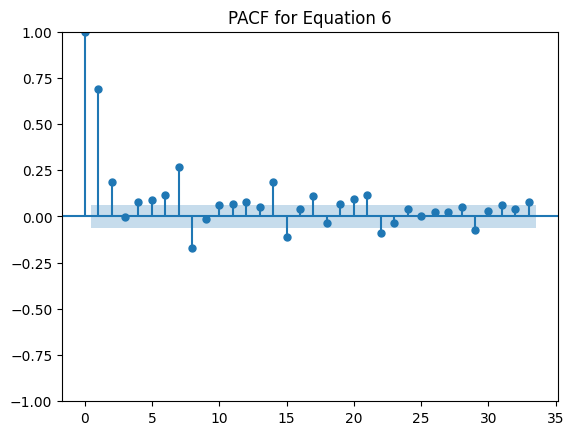

In [24]:
plot_acf(df1['y'], lags=33)
plt.title('ACF for Equation 6')
plt.show()

plot_pacf(df1['y'], lags=33)
plt.title('PACF for Equation 6')
plt.show()

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

# Для оценки первой модели SARIMA(1, 1, 1)x(4, 1, 0, 7)
model1 = SARIMAX(df1['y'], order=(1, 1, 1), seasonal_order=(4, 1, 0, 7))
result1 = model1.fit()

# Для оценки второй модели SARIMA(2, 1, 2)x(2, 1, 3, 7)
model2 = SARIMAX(df1['y'], order=(2, 1, 2), seasonal_order=(2, 1, 3, 7))
result2 = model2.fit()




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Ljung-Box test for Model 1:


KeyError: 1

In [32]:
# Проведение теста Ljung-Box для первой модели
lb_test1 = acorr_ljungbox(result1.resid)
lb_test1

,lb_stat,lb_pvalue
1,5.441574,0.019663
2,26.992290,0.000001
3,28.125810,0.000003
4,28.589621,0.000009
5,29.094621,0.000022
6,29.106293,0.000058
7,30.466898,0.000078
8,31.033603,0.000139
9,31.427158,0.000250
10,32.739082,0.000301


In [34]:
lb_test2 = acorr_ljungbox(result2.resid)
lb_test2

,lb_stat,lb_pvalue
1,0.017005,0.896247
2,0.656204,0.720290
3,1.216067,0.749153
4,3.789083,0.435302
5,4.424430,0.490058
6,4.612580,0.594372
7,5.396118,0.611742
8,5.839906,0.665159
9,5.879670,0.751898
10,9.378002,0.496644


In [36]:
aic1 = result1.aic

# AIC для второй модели
aic2 = result2.aic

print("AIC для первой модели:", aic1)
print("AIC для второй модели:", aic2)

AIC для первой модели: 4557.201534487091
AIC для второй модели: 4376.157815814508
